In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import tensorflow as tf
import scipy.misc

In [9]:
#Eventually use this
data_dir = 'ut-zap50k-images'
for category in os.listdir(data_dir):
    print(category)
    for kind in os.listdir(data_dir+'/'+category):
        print('  '+kind)
        for brand in os.listdir(data_dir+'/'+category+'/'+kind):
            print('    '+brand)
    print("-----------------------")
    

Boots
  Ankle
    A. Testoni
    adidas
    adidas Kids
    adidas Originals
    adidas Originals Kids
    adidas Outdoor
    adidas Y-3 by Yohji Yamamoto
    Aetrex
    Agatha Ruiz De La Prada Kids
    Ahnu
    AIGLE
    ALDO
    Alegria
    Alexander McQueen
    Allen-Edmonds
    Allrounder by Mephisto
    Anne Klein
    Annie
    Aquatalia by Marvin K
    ara
    Aravon
    Arche
    Arcopedico
    Ariat
    Ariat Kids
    Armani Jeans
    Asolo
    Aster Kids
    Badgley Mischka
    Baffin
    Bandolino
    Bass
    Bates Footwear
    Bates Riding Collection
    BC Footwear
    BCBGeneration
    BCBGMAXAZRIA
    Bedstu
    Beeko
    Bella-Vita
    Belle by Sigerson Morrison
    Ben Sherman
    Betsey Johnson
    Betsey Johnson for The Cool People
    Big Buddha
    Bikkembergs
    Biviel
    Black Rooster
    Blondo
    Blowfish
    Blundstone
    Bogs
    Born
    BOSS Black
    BOSS Orange
    Bostonian
    Bottega Veneta
    Bouquets
    Boutique 9
    Brighton
    BRUNO MAGLI
 

In [49]:
#For now to quickly test, just focus on that young Nike
data_dir = 'ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/Nike'

#Extract nike shoes, resize to 256x256,save to folder
count = 1
for img in os.listdir(data_dir):
#     a = Image.open(data_dir+'/'+img)
#     my_img = tf.image.decode_png(data_dir+'/'+img)
    a = plt.imread(data_dir+'/'+img,format='jpg')
    #Resize to 256 by 256
    a = scipy.misc.imresize(a,(256,256,3))
    scipy.misc.imsave('nike_shoes/nikeshoe'+str(count+1000)+'.jpg',a)
    count=count+1


In [104]:
#Pickle nike shoes edge data
data_dir = 'nike_shoes_edge_3ch'
count = 1
num_edge_images = len(os.listdir(data_dir))
nike_edge_data = np.empty((num_edge_images,256,256,3),dtype='uint8')
for img in os.listdir(data_dir):  
    a = plt.imread(data_dir+'/'+'nikeshoeedge'+str(count)+'.jpg')
    nike_edge_data[count-1] = a.astype('uint8')
    count = count + 1

#Save to npy file
nike_edge_data.shape
np.save('nike_edge_data',nike_edge_data)


In [131]:
#Pickle nike shoes data
data_dir = 'nike_shoes'
count = 1001
num_images = len(os.listdir(data_dir))
nike_shoe_data = np.empty((num_images,256,256,3),dtype='uint8')
for img in os.listdir(data_dir):  
    a = plt.imread(data_dir+'/'+'nikeshoe'+str(count)+'.jpg')
    nike_shoe_data[count-1001] = a.astype('uint8')
    count = count + 1




In [134]:
np.save('nike_shoe_data',nike_shoe_data)

In [20]:
#Split facades training images and save for pickle
data_dir = 'facades/train'
count = 1
num_images = len(os.listdir(data_dir))
facades_paint_train_data = np.empty((num_images,256,256,3),dtype='uint8')
facades_bldg_train_data = np.empty((num_images,256,256,3),dtype='uint8')

for img in os.listdir(data_dir):
    a = plt.imread(data_dir+'/'+str(count)+'.jpg')
    left = a[:,:256,:]
    right = a[:,256:,:]
    facades_paint_train_data[count-1] = right
    facades_bldg_train_data[count-1] = left   
    count = count + 1

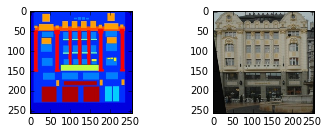

In [27]:
IDX = 1
plt.subplot(221)
plt.imshow(facades_paint_train_data[IDX])
plt.subplot(222)
plt.imshow(facades_bldg_train_data[IDX])

In [28]:
np.save('facades_paint_train_data',facades_paint_train_data)
np.save('facades_bldg_train_data',facades_bldg_train_data)

In [29]:
#Split facades val images and save for pickle
data_dir = 'facades/val'
count = 1
num_images = len(os.listdir(data_dir))
facades_paint_val_data = np.empty((num_images,256,256,3),dtype='uint8')
facades_bldg_val_data = np.empty((num_images,256,256,3),dtype='uint8')

for img in os.listdir(data_dir):
    a = plt.imread(data_dir+'/'+str(count)+'.jpg')
    left = a[:,:256,:]
    right = a[:,256:,:]
    facades_paint_val_data[count-1] = right
    facades_bldg_val_data[count-1] = left   
    count = count + 1

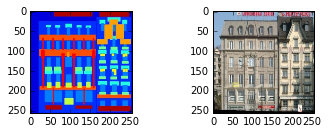

In [30]:
IDX = 1
plt.subplot(221)
plt.imshow(facades_paint_val_data[IDX])
plt.subplot(222)
plt.imshow(facades_bldg_val_data[IDX])

In [31]:
np.save('facades_paint_val_data',facades_paint_val_data)
np.save('facades_bldg_val_data',facades_bldg_val_data)